<img src="images/cads-logo.png" style="height: 100px" align=left> 
<img src="images/eds.png" style="height: 100px" align=right> 

# EDS Capstone

## Submission Guideline

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Preprocessing** - Integrity Check, Exploratory Data Analysis, Cleaning
    2. **Feature Engineering**: Make new features or change the current features
    3. **Feature Selection**: Choose the best features
    4. **Predictive Models**: Create several predictive models and tune the hyperparameters
    5. **Model Evaluation**: Compare the performance of the models
    6. **Choose the Best Model**: Choose the model that has the best performance

The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.


All submissions are to be emailed to the trainer email address **by 3:00 pm of the last day**, indicating the names of all group members and your team name in your email.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
#### Design a predictive model to determine the potential customers. The target variable is `Potential_Customer`. 

You have been provided with information such as customers spending for last several years, the amount of money spent, Number of inactive months and so on.

## Data Description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

# 1. Import necessary Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### 2. Load the Data into Pandas Dataframe

In [4]:
data = pd.read_csv('data.csv')
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


# 3. Data Integrity Check

Data Cleaning (Checking the existance of missing values, the type of variables, or integrity of data) should be done on the whole data. But EDA (checking the relationship of variables, summary of data, outliers, filling missing values etc.) should be done only on train set because we assume our analysis never sees the test set. However, if for instance we decide to fill missing values in one variable with specific number as the result of EDA on train set, then all missing values in both train and test will be filled with than value.

**Attention:**
> Be careful about information leakage from test set!

## 3.1. How big is the data? (number of rows, features and their types)

In [5]:
#data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [6]:
#number of rows and columns

print("Data on rows: {}".format(len(data)))
print("Data on columns: {}".format(len(data.columns)))

Data on rows: 4469
Data on columns: 25


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 3.1.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?
#### 3.1.1.1 Remove the dollar sign and comma from data

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')` 

**Example:** `data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')`

In [8]:
#Removed '$' and ',' signs

data = data.replace({'\$':''}, regex = True)
data = data.replace({'\,':''}, regex = True)

data.head().T


,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,5.00,30.00,NaN,20.00,5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,0.00,25.00,15.00,20.00,3.00
Pur_3_years_Avg,7.50,25.00,15.00,20.00,4.33
Pur_5_years_Avg,7.76,13.00,11.25,12.45,3.80


## 3.2. Check data for duplicate rows

In [9]:
def check_duplicate(d,c):
    if len(d[c])>len(set(d[c])):
        print('Data has duplicate')
    else:
        print('Data does not have duplicate')

check_duplicate(data, 'C_ID')

Data has duplicate


### 3.2.1 Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [10]:
#drop all duplicates

data = data.drop_duplicates()

In [11]:
print(data.drop_duplicates())

#The number of dropped duplicate data
data.info()


      Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                      1    9946              5.00             2           17   
1                      1   87939             30.00             1            7   
2                      0   88003                NaN            5           12   
3                      1  188721             20.00             1           11   
4                      1   88056              5.00             3           15   
...                  ...     ...                ...          ...          ...   
3613                   1   87771             20.00             2            6   
3614                   0   90077                NaN            7           31   
3615                   0   94040                NaN            7           13   
3616                   0   87871                NaN            1           11   
3617                   1   87904             21.00             3           13   

      Pur_3_years_Indirect 

## 3.3. Do we need `C_ID` in our analysis?


In [12]:
#No, because C_ID does not contribute to predict potential customer

data.drop('C_ID', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   object 
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   object 
 7   Pur_3_years_Avg           3618 non-null   object 
 8   Pur_5_years_Avg           3618 non-null   object 
 9   Pur_3_years_Avg_Indirect  2956 non-null   object 
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

## 3.4. Check if the column types are accurate? if not fix them

In [13]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   object 
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   object 
 7   Pur_3_years_Avg           3618 non-null   object 
 8   Pur_5_years_Avg           3618 non-null   object 
 9   Pur_3_years_Avg_Indirect  2956 non-null   object 
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [14]:
#To distinguish data type

CatCols = ['Potential_Customer','Status_Cust', 'Status_Latest_Ad',
         'Gender', 'Cust_Prop']
NumCols = list(set(data.columns)-set(CatCols))

In [15]:
#Change data type 

data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

data.info()

# Only 'Potential_Customer', 'Status_Cust', 'Status_Latest_Ad', 'Gender', 'Cust_Prop' 
# changed into category variables, all other columns changed to float 64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   Cust_Last_Purchase        1736 non-null   float64 
 2   Pur_3_years               3618 non-null   float64 
 3   Pur_5_years               3618 non-null   float64 
 4   Pur_3_years_Indirect      3618 non-null   float64 
 5   Pur_5_years_Indirect      3618 non-null   float64 
 6   Pur_latest                3618 non-null   float64 
 7   Pur_3_years_Avg           3618 non-null   float64 
 8   Pur_5_years_Avg           3618 non-null   float64 
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64 
 10  InAct_Last                3618 non-null   float64 
 11  InAct_First               3618 non-null   float64 
 12  Ad_Res_1_year             3618 non-null   float64 
 13  Ad_Res_3_Year             3618 non-null   float6

# 4. Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [16]:
# define X and Y
X = data.drop('Potential_Customer', axis=1)
y = data['Potential_Customer']

In [17]:
# split data into 75/25 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
#check if X already exclude 'Potential Customer'
X_train.head()

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
3151,5.0,4.0,29.0,2.0,9.0,6.0,7.50,5.45,7.0,4.0,...,86.0,7.0,15.0,22.0,S,1,86.0,F,U,55681.0
1698,16.0,5.0,22.0,4.0,13.0,8.0,8.60,6.82,8.5,9.0,...,62.0,11.0,18.0,27.0,S,1,63.0,F,H,39313.0
2327,15.0,5.0,8.0,2.0,3.0,10.0,9.60,8.00,10.5,17.0,...,37.0,6.0,16.0,16.0,A,0,44.0,M,H,64119.0
721,2.0,6.0,7.0,3.0,3.0,5.0,2.67,2.57,3.0,17.0,...,24.0,6.0,12.0,10.0,A,1,40.0,F,H,49122.0
811,16.0,3.0,15.0,2.0,9.0,10.0,11.33,9.60,12.0,18.0,...,69.0,6.0,14.0,30.0,S,1,71.0,M,H,47917.0


# 5. Exploratory Data Analysis (EDA)

## 5.1. Explore Categorical Variables

In [ ]:
# describe all 5 categorical data columns

data.describe(include = ('category'))

,Potential_Customer,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
count,3618,3618,3618,3618,3618
unique,2,6,2,3,2
top,0,A,1,F,H
freq,1882,2146,2057,1922,1981


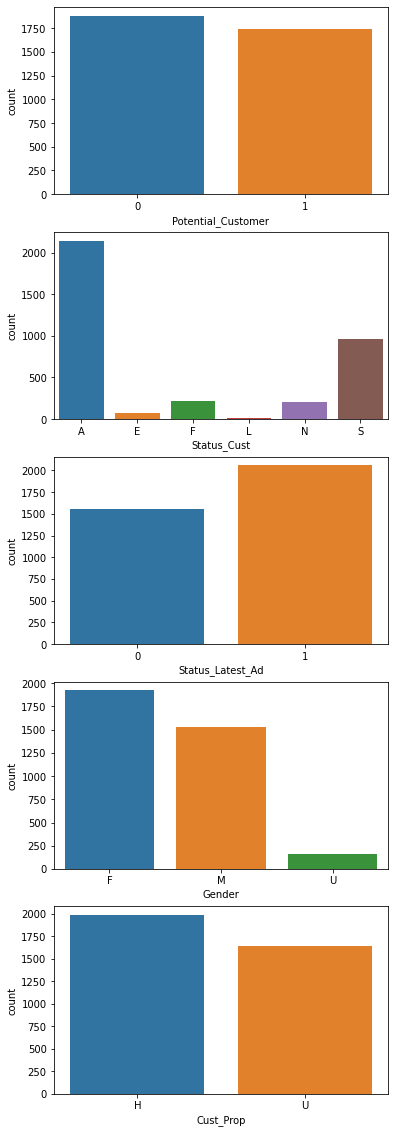

In [ ]:
# countplot for all 5 categorical data

fig, ax=plt.subplots(nrows=len(CatCols), figsize=(6,20))
for a in np.arange(len(CatCols)): 
    sns.countplot(x=data[CatCols[a]],ax=ax[a]);

## 5.2. Explore Relationship Between Categorical & Target Variable

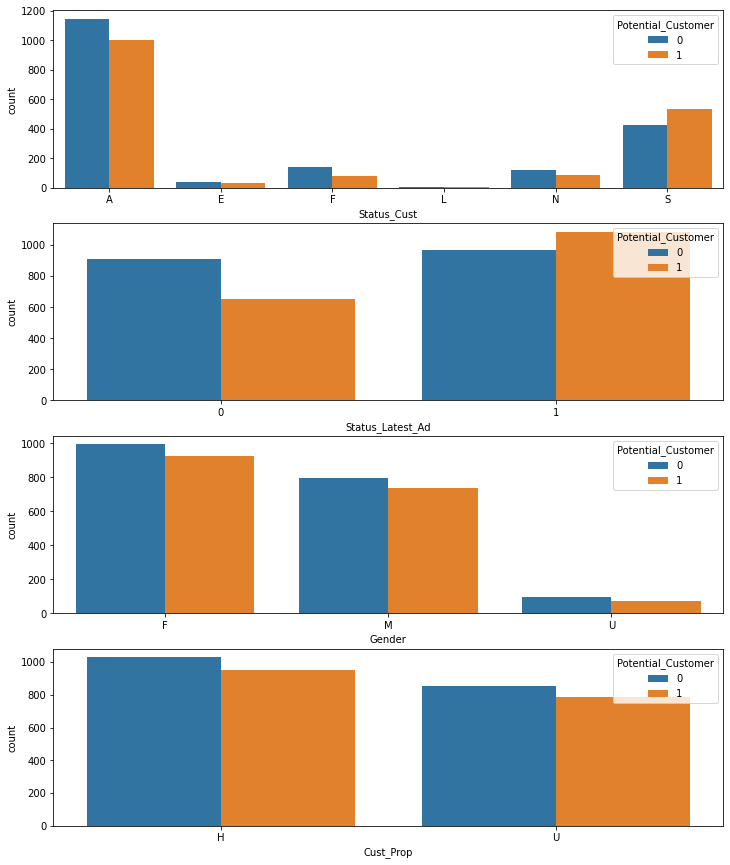

In [ ]:
# countplot for all 5 categorical data - based on Potential_Customer hue

Cats = ['Status_Cust', 'Status_Latest_Ad',
         'Gender', 'Cust_Prop']

fig, ax=plt.subplots(nrows=len(Cats), figsize=(12,15))
for a in np.arange(len(Cats)): 
    sns.countplot(x=data[Cats[a]], hue=data.Potential_Customer,ax=ax[a]);

### 5.2.1 Insight

In [ ]:
# The distribution for Status_Cust and Status Latest Ad are significant to Potential Customer because of we can observe the obvious difference
# While as for gender and cust_prop, they show slight difference which may have only little contribution towards potential customer




### 5.2.2 Solution

In [ ]:
# Categorical variable can be converted into numerical for easier interpretation (This is done in part 8.1)

## 5.3. Explore Numerical Variables

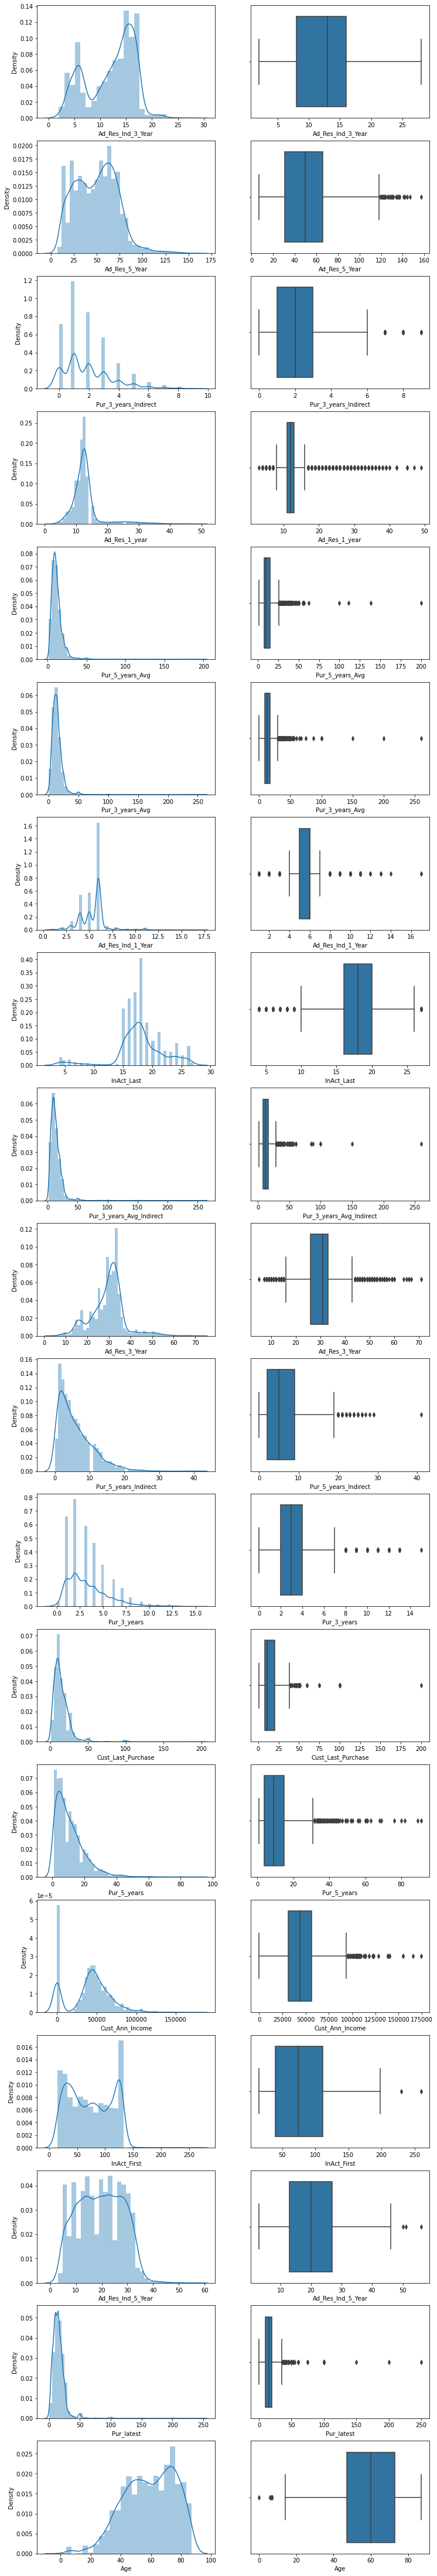

In [ ]:
fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for a in range(len(NumCols)):
    sns.distplot(data[NumCols[a]],ax=ax[a,0])
    sns.boxplot(data[NumCols[a]],ax=ax[a,1]);

In [ ]:
from scipy.stats import skew


In [ ]:
#skewness for all data
data.skew()


Cust_Last_Purchase          4.966810
Pur_3_years                 1.291322
Pur_5_years                 2.079296
Pur_3_years_Indirect        1.124769
Pur_5_years_Indirect        1.287071
Pur_latest                  6.660116
Pur_3_years_Avg             7.913836
Pur_5_years_Avg             6.756579
Pur_3_years_Avg_Indirect    8.043963
InAct_Last                 -0.808274
InAct_First                 0.136455
Ad_Res_1_year               2.788479
Ad_Res_3_Year               0.321259
Ad_Res_5_Year               0.401333
Ad_Res_Ind_1_Year           0.943712
Ad_Res_Ind_3_Year          -0.448007
Ad_Res_Ind_5_Year           0.068045
Age                        -0.406354
Cust_Ann_Income             0.039826
dtype: float64

In [ ]:
# the skewness are mostly right-skewed (positive skewness)

### 5.3.1 Insight

In [ ]:
#Most of the variables show positive skew as they are skewed to the right except for InAct_Last, Age
#Some of the variables have outliers, hence we need to remove them


### 5.3.2 Handling Missing Values

In [ ]:
#Identify missing values
data.isna().sum()

Potential_Customer             0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

In [ ]:
#Display columns with missing values
data.columns[data.isnull().any()]

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

#### 5.3.2.1 Cust_Last_Purchase

In [ ]:
#fill missing values of 'Cust_Last_Purchase' with 0

X_train.Cust_Last_Purchase = X_train.Cust_Last_Purchase.fillna(0)
X_test.Cust_Last_Purchase = X_test.Cust_Last_Purchase.fillna(0)


##### 5.3.2.2 Pur_3_years_Avg_Indirect

In [ ]:
#fill missing values of 'Pur_3_years_Avg_Indirect' with 0

X_train.Pur_3_years_Avg_Indirect = X_train.Pur_3_years_Avg_Indirect.fillna(0)
X_test.Pur_3_years_Avg_Indirect = X_test.Pur_3_years_Avg_Indirect.fillna(0)


#### 5.3.2.3. Age 

In [ ]:
#fill missing values of 'Age' with median age (because cannot be 0)

X_train.Age = X_train.Age.fillna(int(X_train.Age.median())).astype(int)
X_test.Age = X_test.Age.fillna(int(X_train.Age.median())).astype(int)

In [ ]:
X_train.isna().sum()

Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

In [ ]:
X_test.isna().sum()

Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

#### 5.3.2.4. Cust_Ann_Income 

# 6. Feature Enginearing: 


## 6.1. Add Some High Level Features

In [ ]:
#We choose square root to transform data to high level features because most of the parameters are skewed to the right

data['Pur_5_years_Total']=data['Pur_5_years']*data['Pur_5_years_Avg']
data['Pur_3_years_Total']=data['Pur_3_years']*data['Pur_3_years_Avg']
data['Ad_Res_Rate_3_years']=data['Pur_3_years']/(data['Ad_Res_3_Year']+data['Ad_Res_Ind_3_Year']+1)

data['sqrt_Pur_3_years_Indirect']=np.sqrt(data['Pur_3_years_Indirect'])
data['sqrt_Pur_latest']=np.sqrt(data['Pur_latest'])
data['sqrt_Pur_3_years']=np.sqrt(data['Pur_3_years'])
data['sqrt_Pur_3_years_Avg_Indirect']=np.sqrt(data['Pur_3_years_Avg_Indirect'])
data['sqrt_Pur_5_years_Indirect']=np.sqrt(data['Pur_5_years_Indirect'])
data['sqrt_Pur_3_years_Avg']=np.sqrt(data['Pur_3_years_Avg'])
data['sqrt_Pur_5_years']=np.sqrt(data['Pur_5_years'])
data['sqrt_Ad_Res_Rate_3_years']=np.sqrt(data['Ad_Res_Rate_3_years'])
data['sqrt_Pur_5_years_Total']=np.sqrt(data['Pur_5_years_Total'])
data['sqrt_Pur_3_years_Total']=np.sqrt(data['Pur_3_years_Total'])


newCols = ['Pur_5_years_Total','Ad_Res_Rate_3_years','sqrt_Pur_3_years_Indirect','sqrt_Pur_latest', 'sqrt_Pur_3_years','sqrt_Pur_3_years_Avg_Indirect',
           'sqrt_Pur_3_years_Avg','sqrt_Pur_5_years','sqrt_Ad_Res_Rate_3_years','sqrt_Pur_5_years_Total','sqrt_Pur_3_years_Total']

SumCols = newCols + NumCols

In [ ]:
#median for all columns, groupby 'Potential_Customer'

data[newCols+['Potential_Customer']].groupby('Potential_Customer').median().T

Potential_Customer,0,1
Pur_5_years_Total,79.975000,85.000000
Ad_Res_Rate_3_years,0.060606,0.071429
sqrt_Pur_3_years_Indirect,1.000000,1.414214
sqrt_Pur_latest,3.872983,3.464102
sqrt_Pur_3_years,1.732051,1.732051
sqrt_Pur_3_years_Avg_Indirect,3.605551,3.201562
sqrt_Pur_3_years_Avg,3.785499,3.416138
sqrt_Pur_5_years,2.828427,3.162278
sqrt_Ad_Res_Rate_3_years,0.246183,0.267261
sqrt_Pur_5_years_Total,8.942874,9.219544


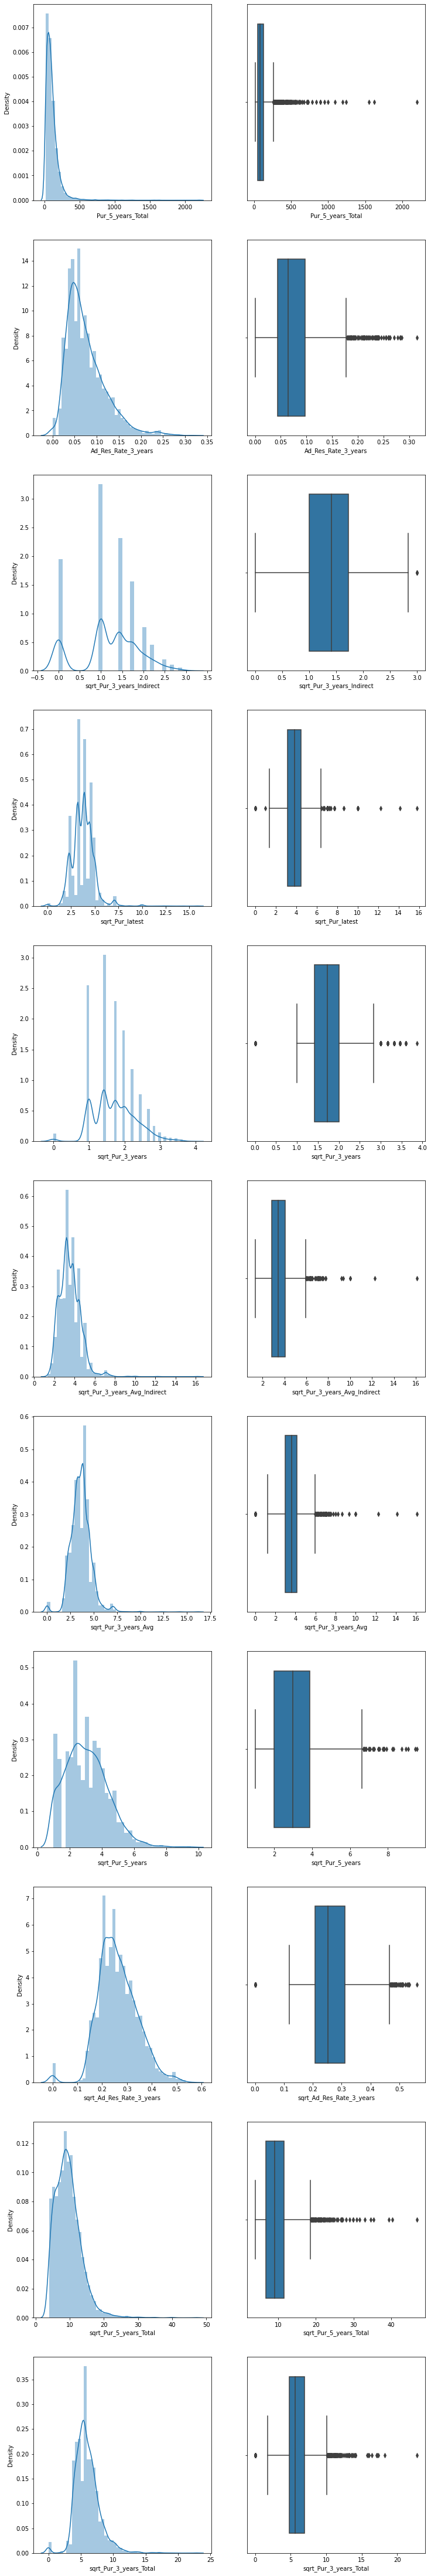

In [ ]:
fig, ax=plt.subplots(nrows=len(newCols), ncols=2, figsize=(12,80))
for a in range(len(newCols)):
    sns.distplot(data[newCols[a]],ax=ax[a,0])
    sns.boxplot(data[newCols[a]],ax=ax[a,1]);

In [ ]:
data.skew()

Cust_Last_Purchase               4.966810
Pur_3_years                      1.291322
Pur_5_years                      2.079296
Pur_3_years_Indirect             1.124769
Pur_5_years_Indirect             1.287071
Pur_latest                       6.660116
Pur_3_years_Avg                  7.913836
Pur_5_years_Avg                  6.756579
Pur_3_years_Avg_Indirect         8.043963
InAct_Last                      -0.808274
InAct_First                      0.136455
Ad_Res_1_year                    2.788479
Ad_Res_3_Year                    0.321259
Ad_Res_5_Year                    0.401333
Ad_Res_Ind_1_Year                0.943712
Ad_Res_Ind_3_Year               -0.448007
Ad_Res_Ind_5_Year                0.068045
Age                             -0.406354
Cust_Ann_Income                  0.039826
Pur_5_years_Total                6.336156
Pur_3_years_Total                4.212279
Ad_Res_Rate_3_years              1.321349
sqrt_Pur_3_years_Indirect       -0.307275
sqrt_Pur_latest                  1

In [ ]:
#After applying square root transformation, the features become more normally distributed. 

In [ ]:
#can try explore Log transformation for left skew, and sqrt transform for right skew

**bold text**## 6.2. Explore Relationship Between Numerical variables & Target Variable

In [ ]:
#median and mean of data groupby 'Potential_Customer'

data.groupby('Potential_Customer').median().T
data.groupby('Potential_Customer').mean().T

Potential_Customer,0,1
Cust_Last_Purchase,NaN,14.557748
Pur_3_years,3.000000,3.643433
Pur_5_years,10.133900,11.978111
Pur_3_years_Indirect,1.698193,2.137673
Pur_5_years_Indirect,5.424548,6.389401
Pur_latest,16.314426,14.132200
Pur_3_years_Avg,15.309469,13.225507
Pur_5_years_Avg,12.775112,10.979493
Pur_3_years_Avg_Indirect,14.693416,12.457223
InAct_Last,18.344315,17.489631


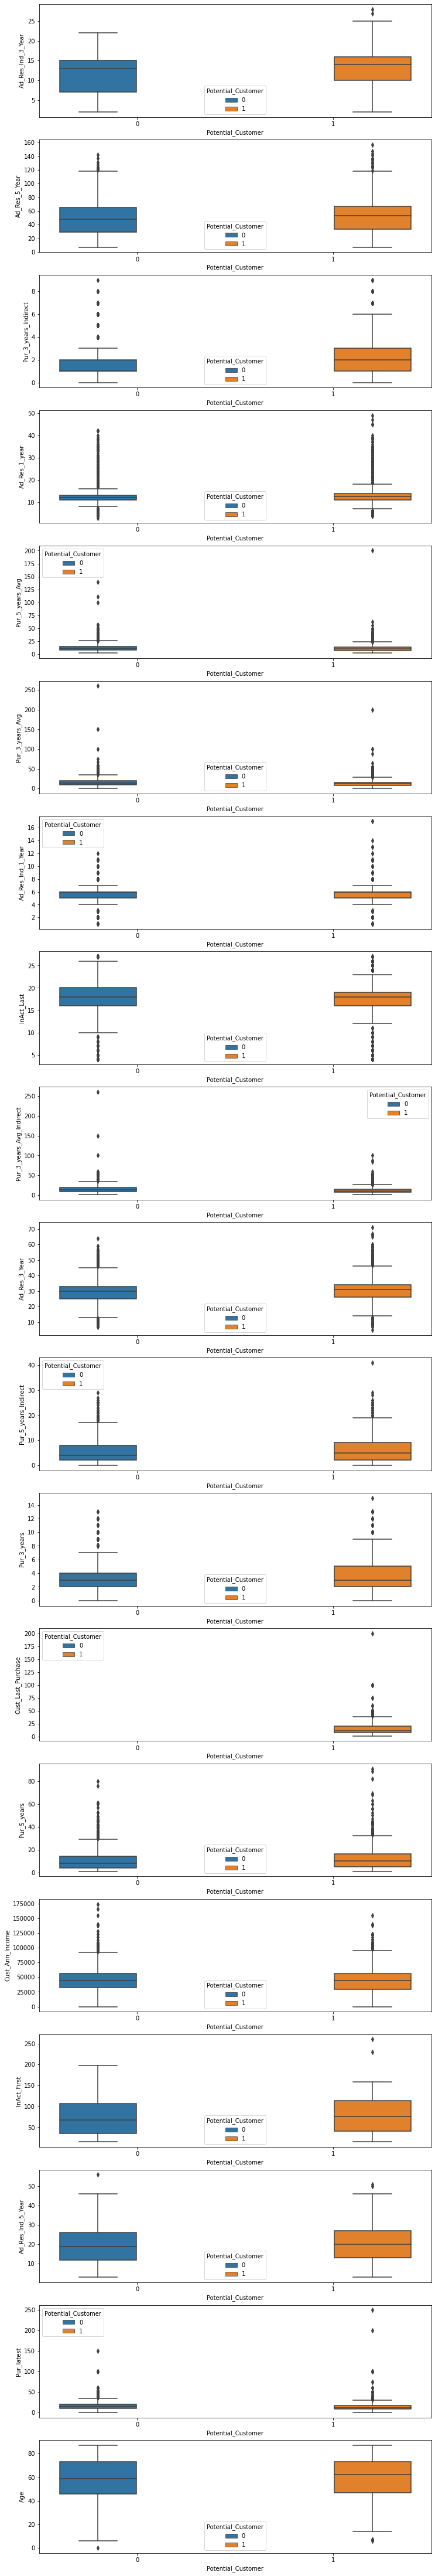

In [ ]:
#boxplot

fig, ax=plt.subplots(nrows=len(NumCols), figsize=(12,80))
for a in np.arange(len(NumCols)): 
    sns.boxplot(x=data.Potential_Customer, y=data[NumCols[a]], hue=data.Potential_Customer,ax=ax[a]);

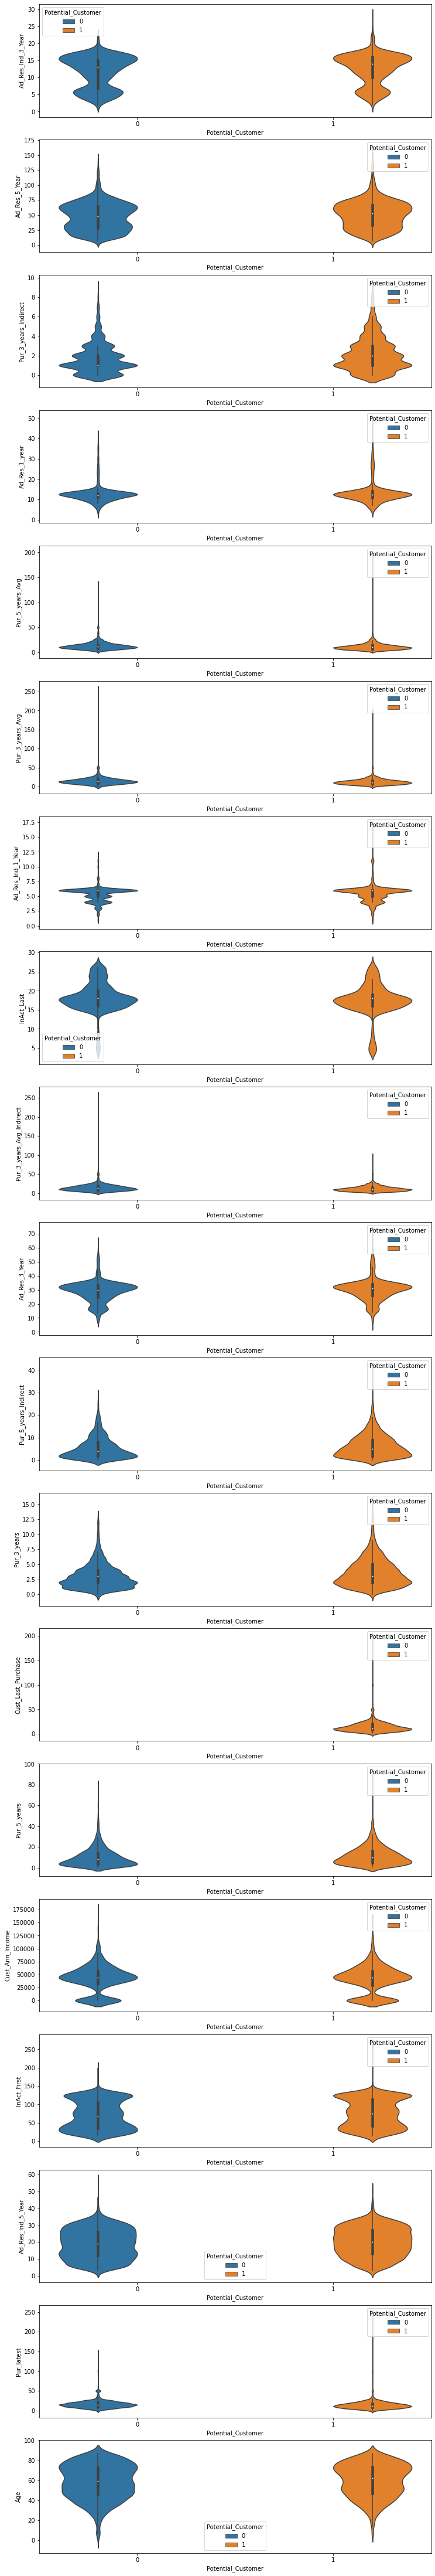

In [ ]:
#violinplot

fig, ax=plt.subplots(nrows=len(NumCols), figsize=(12,80))
for a in np.arange(len(NumCols)): 
    sns.violinplot(x=data.Potential_Customer, y=data[NumCols[a]], hue=data.Potential_Customer,ax=ax[a]);


## 6.3. Explore Correlation between Numerical Variables

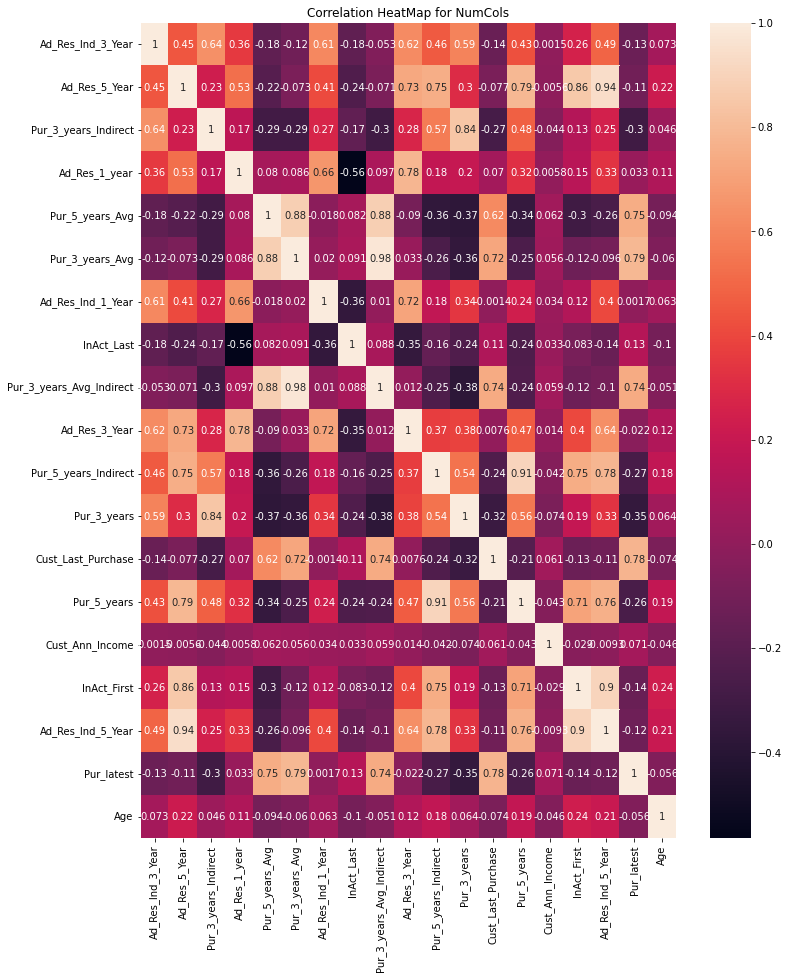

In [ ]:
# HeatMap of Numerical Variables - NumCols

plt.figure(figsize=(12,15))
sns.heatmap(data[NumCols].corr(), annot=True, square=False)
plt.title('Correlation HeatMap for NumCols');

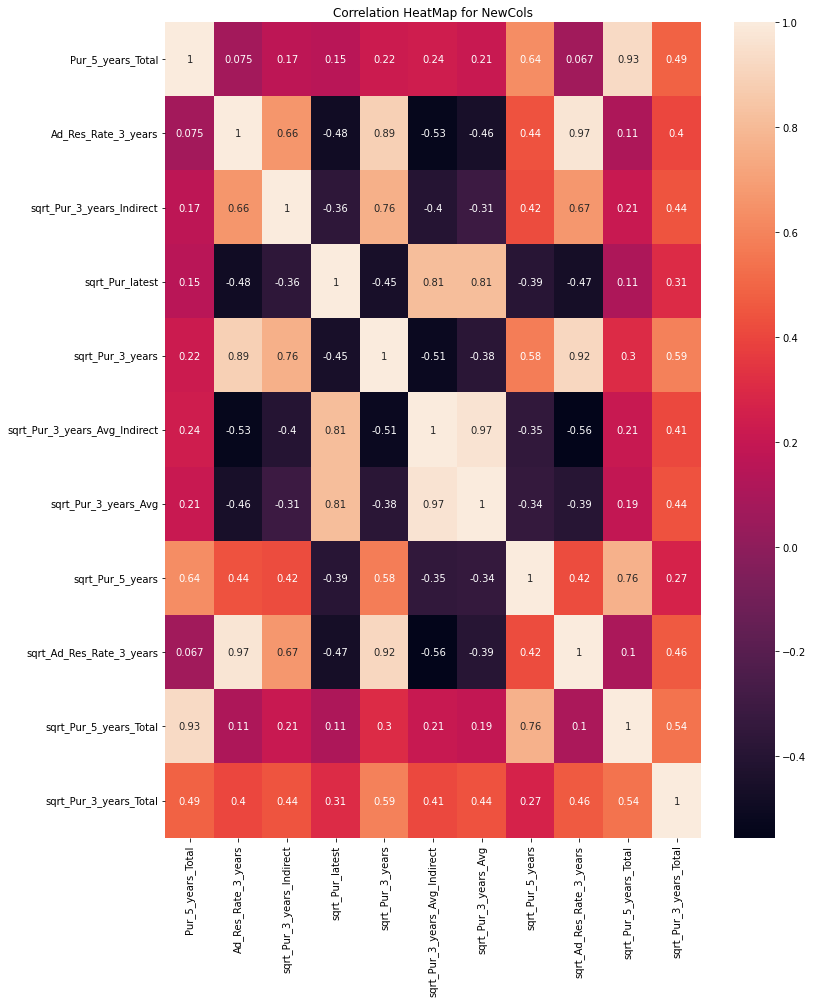

In [ ]:
# HeatMap of Numerical Variables - NewCols

plt.figure(figsize=(12,15))
sns.heatmap(data[newCols].corr(), annot=True, square=False)
plt.title('Correlation HeatMap for NewCols');

# 7. Feature Selection

In [ ]:

# Based on heatmap, some of the numerical data have high correlation thus, it is better to exclude numerical columns with high correlations
# Therefore, use automatic feature selection techniques which is Principle Component Analysis (PCA) for data reduction
# The feature selection is performed as a pre-processing step before doing the actual learning like in part 8.2 Data Scaling

# 8. Data PreProcessing

## 8.1 Dummy Variables

In [ ]:
# Change categorical variables to numerical variables (0 or 1) using dummy variables

X_train_dum = pd.get_dummies(X_train, drop_first=True).reset_index(drop=True)
X_test_dum = pd.get_dummies(X_test, drop_first=True).reset_index(drop=True)

In [ ]:
X_train_dum
X_test_dum

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Cust_Ann_Income,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
0,10.0,6.0,12.0,3.0,6.0,11.0,9.67,7.17,11.00,16.0,...,44789.0,0,0,0,0,0,1,0,1,1
1,15.0,4.0,8.0,2.0,4.0,15.0,11.25,8.63,10.00,18.0,...,46901.0,0,0,0,0,1,1,0,0,1
2,0.0,7.0,9.0,4.0,5.0,10.0,8.43,7.89,8.75,17.0,...,49219.0,0,0,0,0,1,1,0,0,0
3,0.0,2.0,6.0,2.0,4.0,21.0,18.00,12.00,18.00,16.0,...,60483.0,0,0,0,0,0,0,1,0,0
4,20.0,6.0,7.0,4.0,5.0,20.0,17.50,16.43,20.00,16.0,...,0.0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,0.0,5.0,5.0,2.0,2.0,10.0,8.20,8.20,9.50,18.0,...,38328.0,0,0,0,0,0,0,0,0,0
901,0.0,1.0,1.0,1.0,1.0,25.0,25.00,25.00,25.00,24.0,...,28646.0,0,0,0,1,0,0,0,0,0
902,10.0,4.0,13.0,2.0,8.0,10.0,8.75,9.15,10.00,16.0,...,0.0,0,0,0,0,0,1,0,0,1
903,5.0,5.0,9.0,3.0,5.0,12.0,11.40,9.00,10.67,17.0,...,80946.0,0,0,0,0,0,0,1,0,0


## 8.2 Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
pw_scale = PowerTransformer().fit(X_train_dum[NumCols])

X_train_pw=pd.DataFrame(pw_scale.transform(X_train_dum[NumCols]), columns=NumCols)
X_test_pw=pd.DataFrame(pw_scale.transform(X_test_dum[NumCols]), columns=NumCols)

X_train_pw.index=X_train_dum.index
X_test_pw.index=X_test_dum.index

train_pw=pd.concat([X_train_pw, X_train_dum[['Cust_Prop_U', 'Status_Cust_S',
       'Status_Cust_N', 'Gender_M', 'Gender_U','Status_Latest_Ad_1']]],axis=1)

test_pw=pd.concat([X_test_pw, X_test_dum[['Cust_Prop_U', 'Status_Cust_S',
       'Status_Cust_N', 'Gender_M', 'Gender_U','Status_Latest_Ad_1']]],axis=1)

In [ ]:
# Standardize the Data - scale the features in the data before applying PCA

scaler=MinMaxScaler().fit(X_train_dum)
X_train_Scaled=pd.DataFrame(scaler.transform(X_train_dum), columns=X_train_dum.columns)
X_test_Scaled=pd.DataFrame(scaler.transform(X_test_dum), columns=X_test_dum.columns)

In [ ]:
from sklearn.decomposition import PCA
train_PCA=X_train_Scaled[NumCols]
test_PCA=X_test_Scaled[NumCols]

In [ ]:
X_train

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
3151,5.0,4.0,29.0,2.0,9.0,6.0,7.50,5.45,7.00,4.0,...,86.0,7.0,15.0,22.0,S,1,86,F,U,55681.0
1698,16.0,5.0,22.0,4.0,13.0,8.0,8.60,6.82,8.50,9.0,...,62.0,11.0,18.0,27.0,S,1,63,F,H,39313.0
2327,15.0,5.0,8.0,2.0,3.0,10.0,9.60,8.00,10.50,17.0,...,37.0,6.0,16.0,16.0,A,0,44,M,H,64119.0
721,2.0,6.0,7.0,3.0,3.0,5.0,2.67,2.57,3.00,17.0,...,24.0,6.0,12.0,10.0,A,1,40,F,H,49122.0
811,16.0,3.0,15.0,2.0,9.0,10.0,11.33,9.60,12.00,18.0,...,69.0,6.0,14.0,30.0,S,1,71,M,H,47917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0.0,7.0,45.0,6.0,27.0,15.0,14.14,9.80,13.17,16.0,...,82.0,5.0,16.0,33.0,S,1,46,F,U,88242.0
2424,0.0,2.0,4.0,1.0,2.0,15.0,12.00,9.00,15.00,17.0,...,39.0,6.0,14.0,15.0,A,0,59,U,U,0.0
2788,10.0,3.0,21.0,0.0,11.0,11.0,10.33,5.38,0.00,16.0,...,75.0,5.0,5.0,30.0,S,1,79,M,H,63092.0
1813,0.0,4.0,8.0,2.0,2.0,15.0,12.25,12.38,13.50,22.0,...,43.0,6.0,17.0,18.0,A,0,79,F,H,52311.0


In [ ]:
# PCA is used to reduce the dimension - project to 2 dimensions
pca = PCA(2) 
projected = pca.fit_transform(train_PCA)

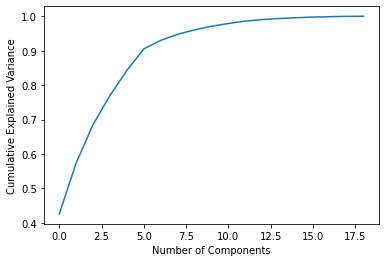

In [ ]:
pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [ ]:
pca=PCA(n_components=7).fit(train_PCA)

PCA_train=pd.DataFrame(pca.transform(train_PCA))
PCA_train.index=X_train.index

PCA_test=pd.DataFrame(pca.transform(test_PCA))
PCA_test.index=X_test.index

X_train_pca=pd.concat([PCA_train, X_train_dum[['Cust_Prop_U', 'Status_Cust_S',
       'Status_Cust_N', 'Gender_M', 'Gender_U','Status_Latest_Ad_1']]],axis=1)

X_test_pca=pd.concat([PCA_test, X_test_dum[['Cust_Prop_U', 'Status_Cust_S',
       'Status_Cust_N', 'Gender_M', 'Gender_U','Status_Latest_Ad_1']]],axis=1)

# 9. Model Creation

In [ ]:
# KNN
knn_param_grid = {'n_neighbors': np.arange(1, 20),
              'p': [1,2],
              'weights': ['uniform','distance']}

grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc',
                    cv=3)

grid.fit(X_train_dum, y_train)

print("KNN best parameters : ", grid.best_params_)
knn_model = grid.best_estimator_
knn_model.fit(X_train_dum,y_train)

print("KNN best score : ", grid.best_score_)

knn_pred = knn_model.predict(X_test_dum)
print("KNN best confustion matrix on the test data \n ", confusion_matrix(y_test, knn_pred))
print("**********************************************************")
print("KNN best model precision score on the test data = {:.2f}".format(precision_score(y_test, knn_pred)))
print("KNN best model recall score on the test data = {:.2f}".format(recall_score(y_test, knn_pred)))
print("KNN best model F1 score on the test data = {:.2f}".format(f1_score(y_test, knn_pred)))
print("KNN best model accuracy score on the test data = {:.2f}".format(accuracy_score(y_test, knn_pred)))

KNN best parameters :  {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
KNN best score :  0.6656763682963797
KNN best confustion matrix on the test data 
  [[321 150]
 [173 261]]
**********************************************************
KNN best model precision score on the test data = 0.64
KNN best model recall score on the test data = 0.60
KNN best model F1 score on the test data = 0.62
KNN best model accuracy score on the test data = 0.64


In [ ]:
# DecisionTree
dt_param_grid = {"max_depth" : np.arange(1,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1),dt_param_grid, scoring='roc_auc',cv=3)

dt_grid.fit(X_train_dum, y_train)
print("Decision Tree best parameters: ",dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print("Decision Tree best scores: ",dt_grid.best_score_)


Decision Tree best parameters:  {'max_depth': 1}
Decision Tree best scores:  0.9996159754224271


In [ ]:
# Logistic Regression
lr_param_grid = {'fit_intercept': [True,False],'C': [0.001,0.01,1,10,100],
              'penalty' : ['l1','l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=3)

logr_grid.fit(X_train_dum, y_train)
print("Logistic Regression best parameters: ", logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print("Logistic Regression best scores: ", logr_grid.best_score_)

Logistic Regression best parameters:  {'C': 1, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression best scores:  1.0


# 10. Model Evaluation & Comparison

In [ ]:
# define new function 'best_model'

def best_model(X_train, X_test, y_train, y_test, model, params, CV = 3, **kwargs):
    param_grid = params
    grid = GridSearchCV(model,param_grid,cv = CV,
                        scoring = 'roc_auc', return_train_score = True)
    grid.fit(X_train, y_train)
    best_par = grid.best_params_
    best_model = grid.best_estimator_.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    best_sc = grid.best_score_
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return best_par, best_sc, f1, conf_matrix, class_report



In [ ]:
train_list = [X_train_dum, X_train_pw, PCA_train]
test_list = [X_test_dum, X_test_pw, PCA_test ]
data_names = ['Original','Power_transform', 'PCA_transform']
model_names = ['KNN','DecisionTree','Logistic Regression','SVM']
models=[KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(solver='saga', max_iter=800), SVC()]

knn_param_grid = {'n_neighbors' :np.arange(10, 40), 'weights':['uniform','distance'],'p': [1,2]}

dt_param_grid = {'max_depth': np.arange(1,10)}

lr_param_grid = {'C':[0.0001, 0.001, 0.004, 0.01, 0.04, 1, 10, 100], 'penalty':['l1', 'l2']}

svc_param_grid = {'C':[0.001, 0.004, 0.01, 0.04, 0.1, 1, 10], 'kernel':['liner', 'rbf'], 'gamma':[0.01, 0.1, 1]}

params=[knn_param_grid, dt_param_grid, lr_param_grid, svc_param_grid ]


In [ ]:
# define new function 'Report'

def Report(data_name,model_name, model):
    print("""
Data : {} 
Model : {}
Best_parameters :
{}

Best_Score :
{}

F1 Score :
{}

Confusion_Matrix :
{}

Classification report :
{}
----------------------------------------------
""".format(data_name, model_name, model[0], model[1],model[2],model[3],model[4]))

In [ ]:
knn_model_0 = best_model(train_list[0], test_list[0], y_train, y_test, models[0], params = params[0])
Report(data_names[0], model_names[0], knn_model_0)


Data : Original 
Model : KNN
Best_parameters :
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Best_Score :
0.6630746065539224

F1 Score :
0.6181384248210023

Confusion_Matrix :
[[326 145]
 [175 259]]

Classification report :
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       471
           1       0.64      0.60      0.62       434

    accuracy                           0.65       905
   macro avg       0.65      0.64      0.64       905
weighted avg       0.65      0.65      0.65       905

----------------------------------------------



In [ ]:
knn_model_1 = best_model(train_list[1], test_list[1], y_train, y_test, models[0], params = params[0])
Report(data_names[1], model_names[0], knn_model_1)


Data : Power_transform 
Model : KNN
Best_parameters :
{'n_neighbors': 38, 'p': 2, 'weights': 'distance'}

Best_Score :
0.9995068865597262

F1 Score :
0.9862700228832951

Confusion_Matrix :
[[462   9]
 [  3 431]]

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       471
           1       0.98      0.99      0.99       434

    accuracy                           0.99       905
   macro avg       0.99      0.99      0.99       905
weighted avg       0.99      0.99      0.99       905

----------------------------------------------



In [ ]:
knn_model_2 = best_model(train_list[2], test_list[2], y_train, y_test, models[0], params = params[0])
Report(data_names[2], model_names[0], knn_model_2)


Data : PCA_transform 
Model : KNN
Best_parameters :
{'n_neighbors': 31, 'p': 1, 'weights': 'distance'}

Best_Score :
0.5715733651919166

F1 Score :
0.47058823529411764

Confusion_Matrix :
[[281 190]
 [242 192]]

Classification report :
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       471
           1       0.50      0.44      0.47       434

    accuracy                           0.52       905
   macro avg       0.52      0.52      0.52       905
weighted avg       0.52      0.52      0.52       905

----------------------------------------------



In [ ]:
dt_model_0 = best_model(train_list[0], test_list[0], y_train, y_test, models[1], params = params[1])
Report(data_names[0], model_names[1], dt_model_0)


Data : Original 
Model : DecisionTree
Best_parameters :
{'max_depth': 1}

Best_Score :
0.9996159754224271

F1 Score :
1.0

Confusion_Matrix :
[[471   0]
 [  0 434]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       434

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

----------------------------------------------



In [ ]:
dt_model_1 = best_model(train_list[1], test_list[1], y_train, y_test, models[1], params = params[1])
Report(data_names[1], model_names[1], dt_model_1)


Data : Power_transform 
Model : DecisionTree
Best_parameters :
{'max_depth': 1}

Best_Score :
1.0

F1 Score :
1.0

Confusion_Matrix :
[[471   0]
 [  0 434]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       434

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

----------------------------------------------



In [ ]:
dt_model_2 = best_model(train_list[2], test_list[2], y_train, y_test, models[1], params = params[1])
Report(data_names[2], model_names[1], dt_model_2)


Data : PCA_transform 
Model : DecisionTree
Best_parameters :
{'max_depth': 6}

Best_Score :
0.5535338206353163

F1 Score :
0.4005681818181818

Confusion_Matrix :
[[342 129]
 [293 141]]

Classification report :
              precision    recall  f1-score   support

           0       0.54      0.73      0.62       471
           1       0.52      0.32      0.40       434

    accuracy                           0.53       905
   macro avg       0.53      0.53      0.51       905
weighted avg       0.53      0.53      0.51       905

----------------------------------------------



In [ ]:
lr_model_0 = best_model(train_list[0], test_list[0], y_train, y_test, models[2], params = params[2])
Report(data_names[0], model_names[2], lr_model_0)


Data : Original 
Model : Logistic Regression
Best_parameters :
{'C': 0.004, 'penalty': 'l2'}

Best_Score :
0.5631052043110675

F1 Score :
0.33962264150943394

Confusion_Matrix :
[[377  94]
 [326 108]]

Classification report :
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       471
           1       0.53      0.25      0.34       434

    accuracy                           0.54       905
   macro avg       0.54      0.52      0.49       905
weighted avg       0.54      0.54      0.50       905

----------------------------------------------



In [ ]:
lr_model_1 = best_model(train_list[1], test_list[1], y_train, y_test, models[2], params = params[2])
Report(data_names[1], model_names[2], lr_model_1)


Data : Power_transform 
Model : Logistic Regression
Best_parameters :
{'C': 0.004, 'penalty': 'l1'}

Best_Score :
1.0

F1 Score :
1.0

Confusion_Matrix :
[[471   0]
 [  0 434]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       434

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

----------------------------------------------



In [ ]:
lr_model_2 = best_model(train_list[2], test_list[2], y_train, y_test, models[2], params = params[2])
Report(data_names[2], model_names[2], lr_model_2)


Data : PCA_transform 
Model : Logistic Regression
Best_parameters :
{'C': 0.04, 'penalty': 'l2'}

Best_Score :
0.5795298645420395

F1 Score :
0.45682451253481887

Confusion_Matrix :
[[351 120]
 [270 164]]

Classification report :
              precision    recall  f1-score   support

           0       0.57      0.75      0.64       471
           1       0.58      0.38      0.46       434

    accuracy                           0.57       905
   macro avg       0.57      0.56      0.55       905
weighted avg       0.57      0.57      0.55       905

----------------------------------------------



In [ ]:
svm_model_0 = best_model(train_list[0], test_list[0], y_train, y_test, models[3], params = params[3])
Report(data_names[0], model_names[3], svm_model_0)


Data : Original 
Model : SVM
Best_parameters :
{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

Best_Score :
0.6553529369232388

F1 Score :
0.0

Confusion_Matrix :
[[471   0]
 [434   0]]

Classification report :
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       471
           1       0.00      0.00      0.00       434

    accuracy                           0.52       905
   macro avg       0.26      0.50      0.34       905
weighted avg       0.27      0.52      0.36       905

----------------------------------------------



In [ ]:
svm_model_1 = best_model(train_list[1], test_list[1], y_train, y_test, models[3], params = params[3])
Report(data_names[1], model_names[3], svm_model_1)


Data : Power_transform 
Model : SVM
Best_parameters :
{'C': 0.04, 'gamma': 0.01, 'kernel': 'rbf'}

Best_Score :
1.0

F1 Score :
1.0

Confusion_Matrix :
[[471   0]
 [  0 434]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       434

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

----------------------------------------------



In [ ]:
svm_model_2 = best_model(train_list[2], test_list[2], y_train, y_test, models[3], params = params[3])
Report(data_names[2], model_names[3], svm_model_2)


Data : PCA_transform 
Model : SVM
Best_parameters :
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Best_Score :
0.5837064462490147

F1 Score :
0.3575949367088608

Confusion_Matrix :
[[386  85]
 [321 113]]

Classification report :
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       471
           1       0.57      0.26      0.36       434

    accuracy                           0.55       905
   macro avg       0.56      0.54      0.51       905
weighted avg       0.56      0.55      0.51       905

----------------------------------------------

